In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("train.csv", parse_dates=['date'], index_col=['date'])
train.info()
train.head()
#print(train.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
dtypes: int64(3)
memory usage: 27.9 MB


,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


from matplotlib import pyplot as plt
_df_0['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#check for missing values in train data
train.isnull().sum()

store    0
item     0
sales    0
dtype: int64

that means no missing values in our training dataset

In [ ]:
train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


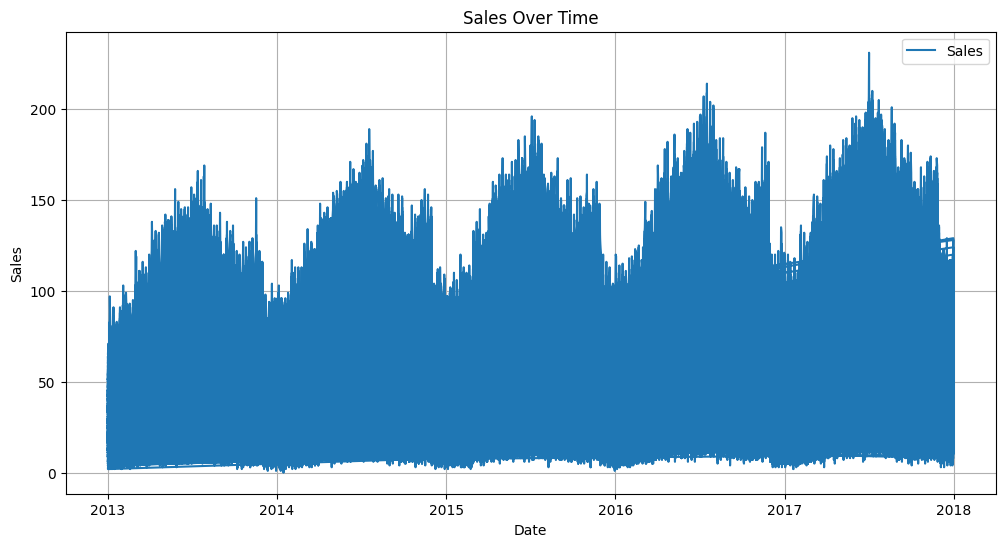

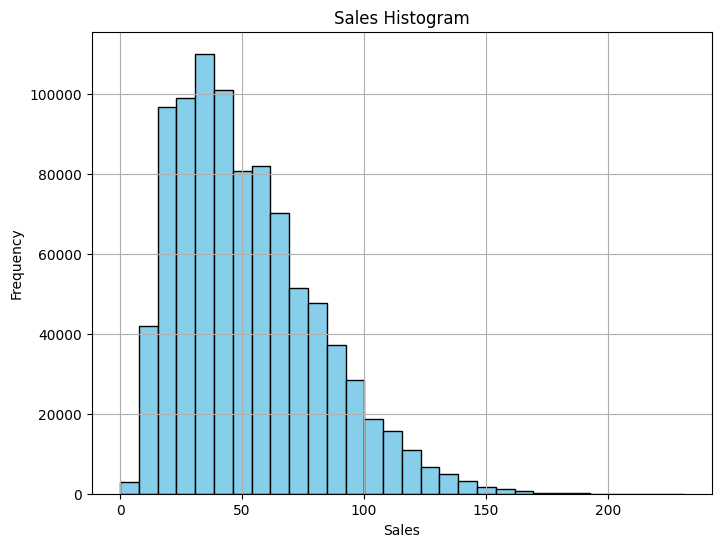

Summary Statistics for Sales:
count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(train['sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(train['sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sales Histogram')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary Statistics
summary_stats = train['sales'].describe()
print("Summary Statistics for Sales:")
print(summary_stats)


In [ ]:
#removing outliers
import pandas as pd

# Splitting the data and keeping the last 3 months as validation data
train_data = train.iloc[:-90].copy()

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return df[~outliers]

# Removing outliers from the 'sales' column in the training data
train = remove_outliers(train_data, 'sales')
# Displaying basic info about the cleaned training data
train.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900943 entries, 2013-01-01 to 2017-10-02
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   900943 non-null  int64
 1   item    900943 non-null  int64
 2   sales   900943 non-null  int64
dtypes: int64(3)
memory usage: 27.5 MB


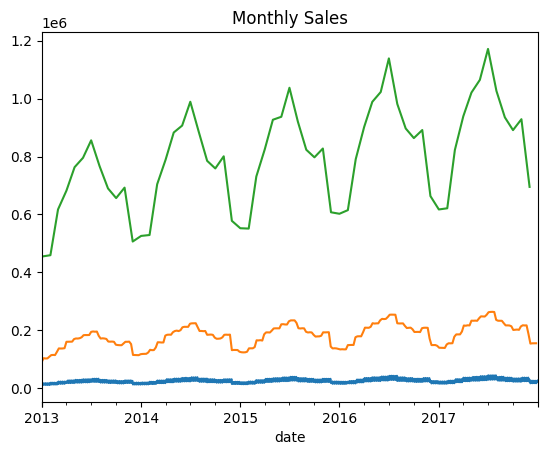

In [ ]:

# Daily Sales
daily_sales = train.groupby(train.index)['sales'].sum()

# Weekly and Monthly Sales
weekly_sales = train.resample('W')['sales'].sum()
monthly_sales = train.resample('M')['sales'].sum()

# Plotting
daily_sales.plot(title='Daily Sales')
weekly_sales.plot(title='Weekly Sales')
monthly_sales.plot(title='Monthly Sales')
plt.show()

# Store-wise Analysis (if applicable)
for store in train['store'].unique():
    store_data = train[train['store'] == store]
    # Perform similar aggregations and plots for each store


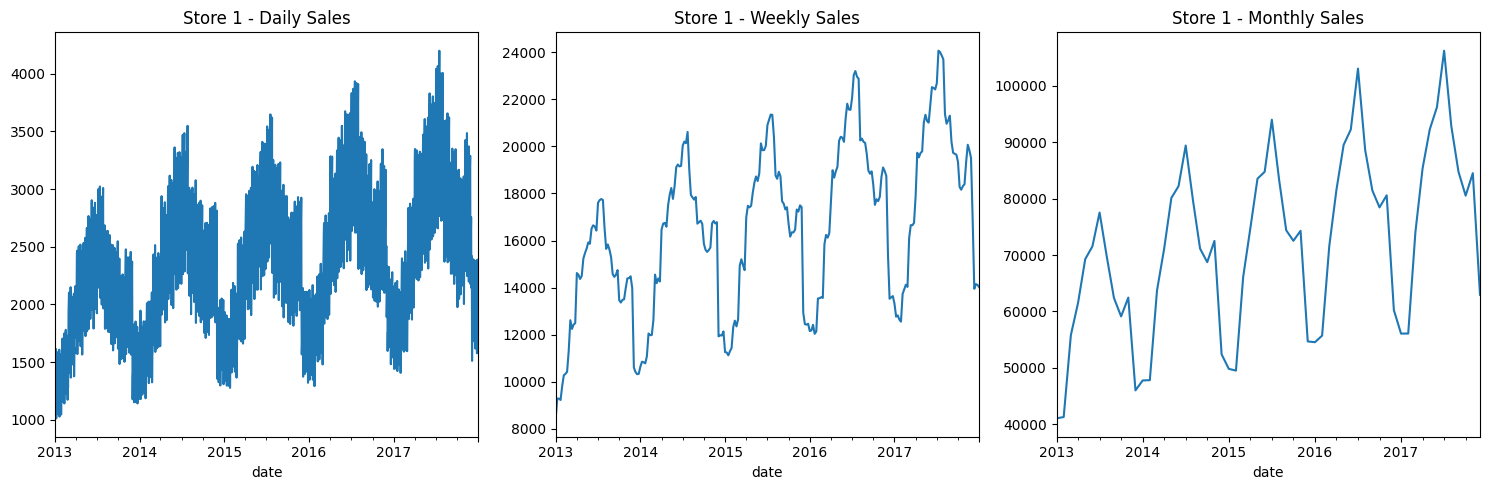

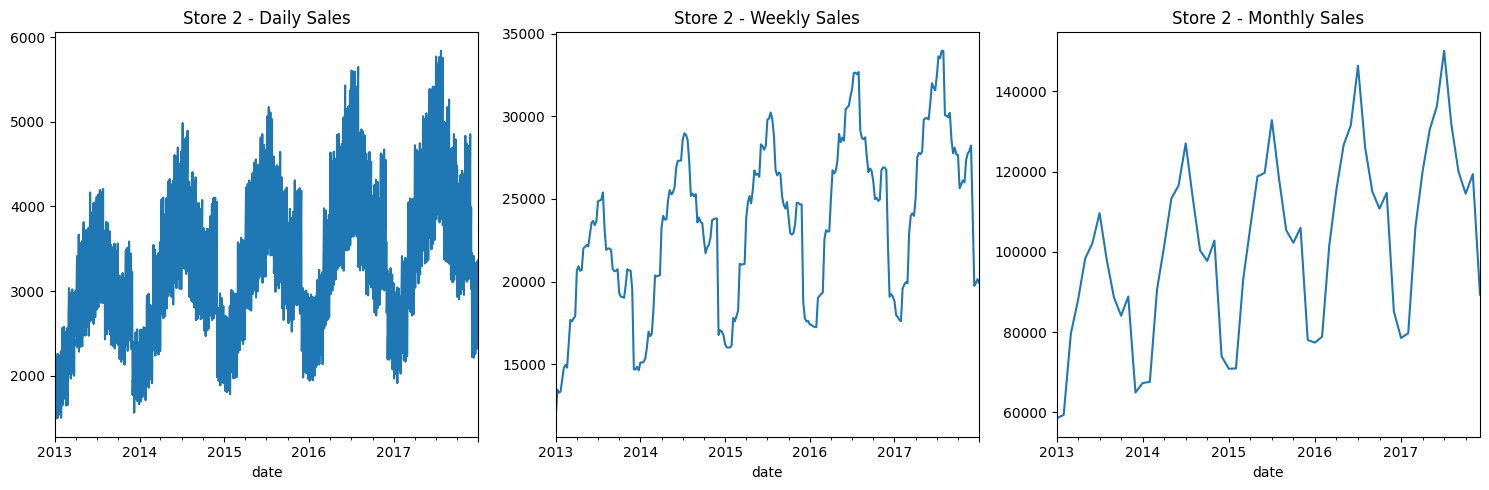

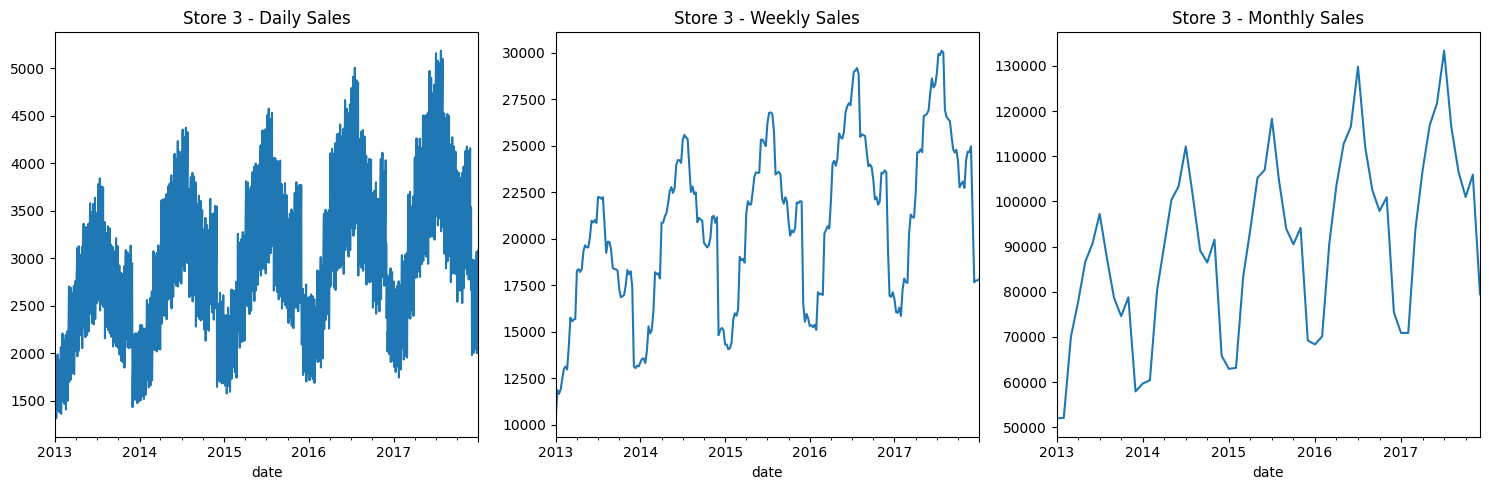

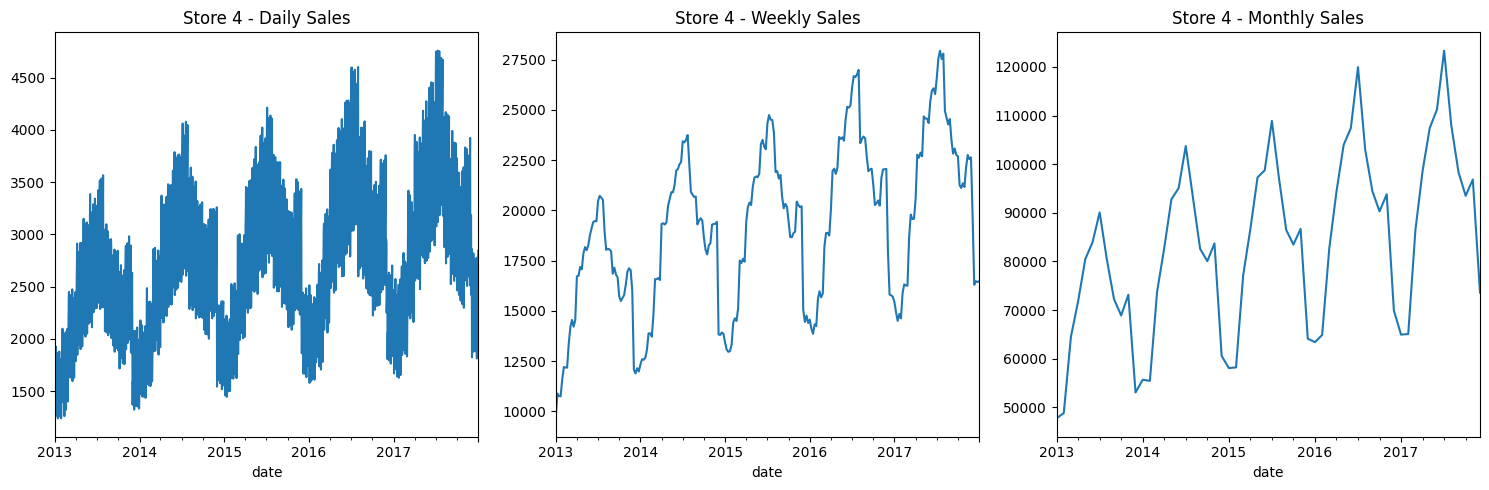

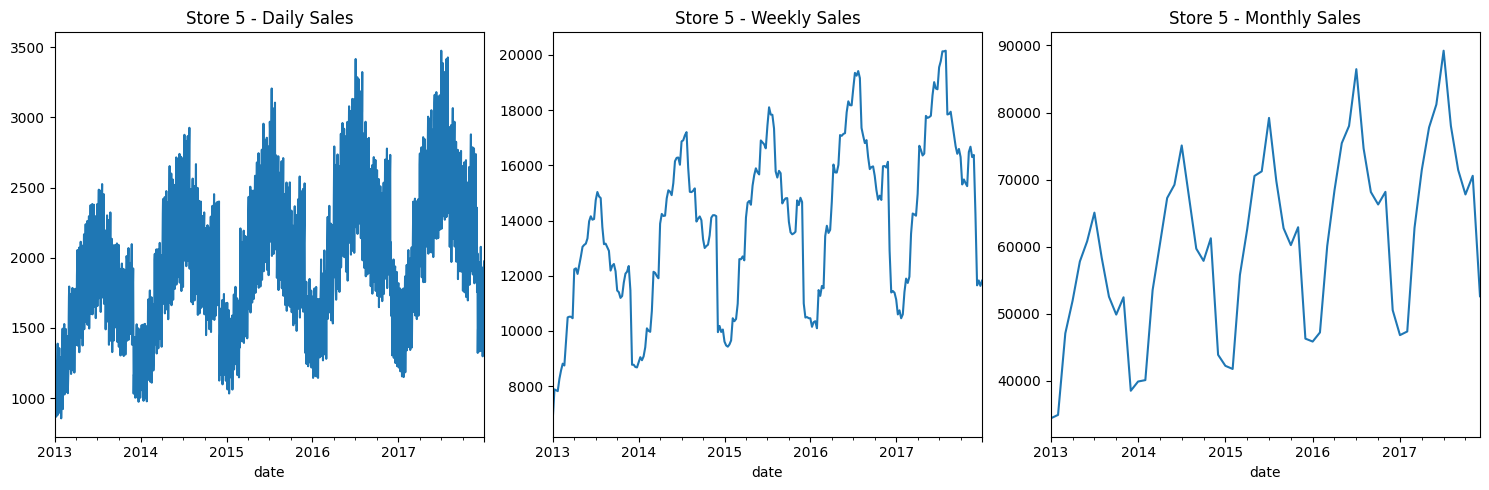

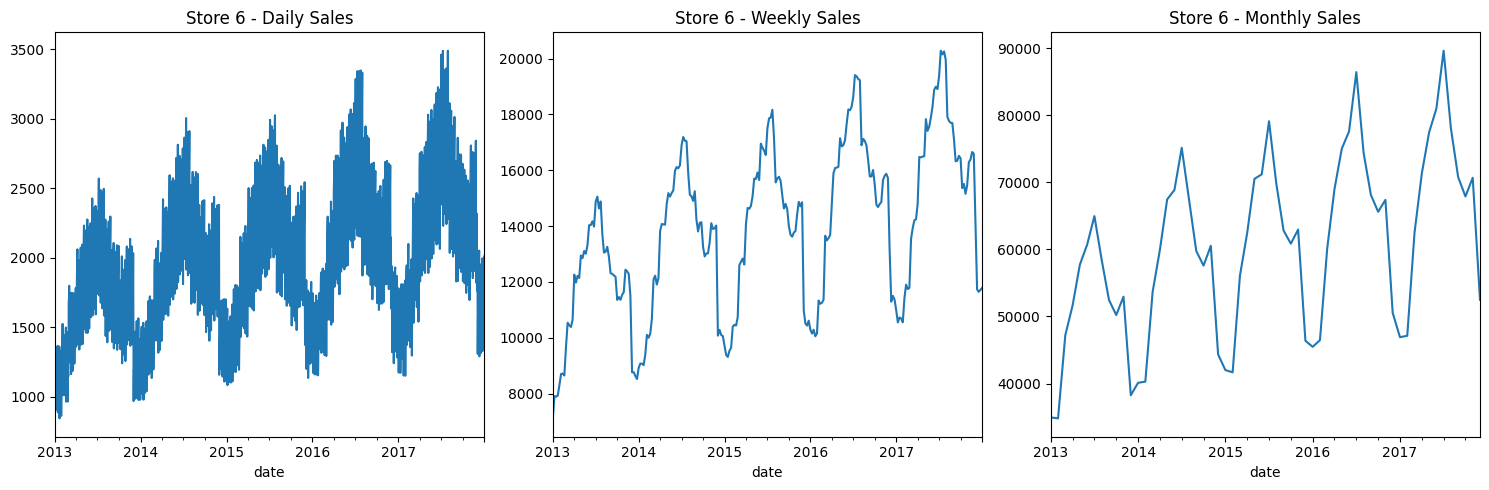

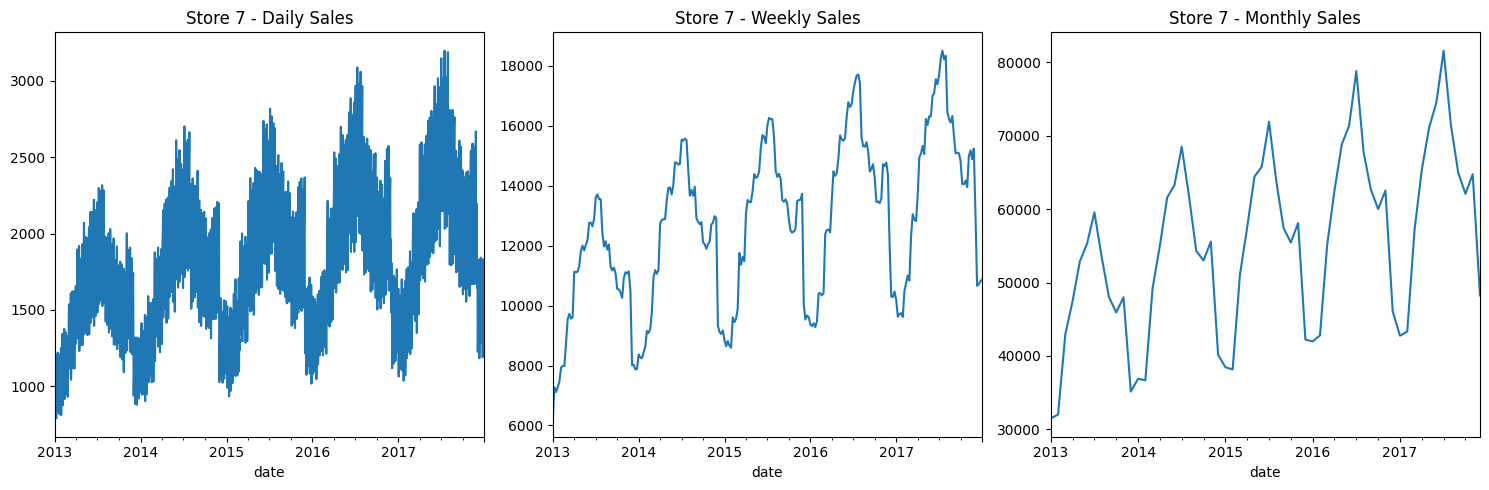

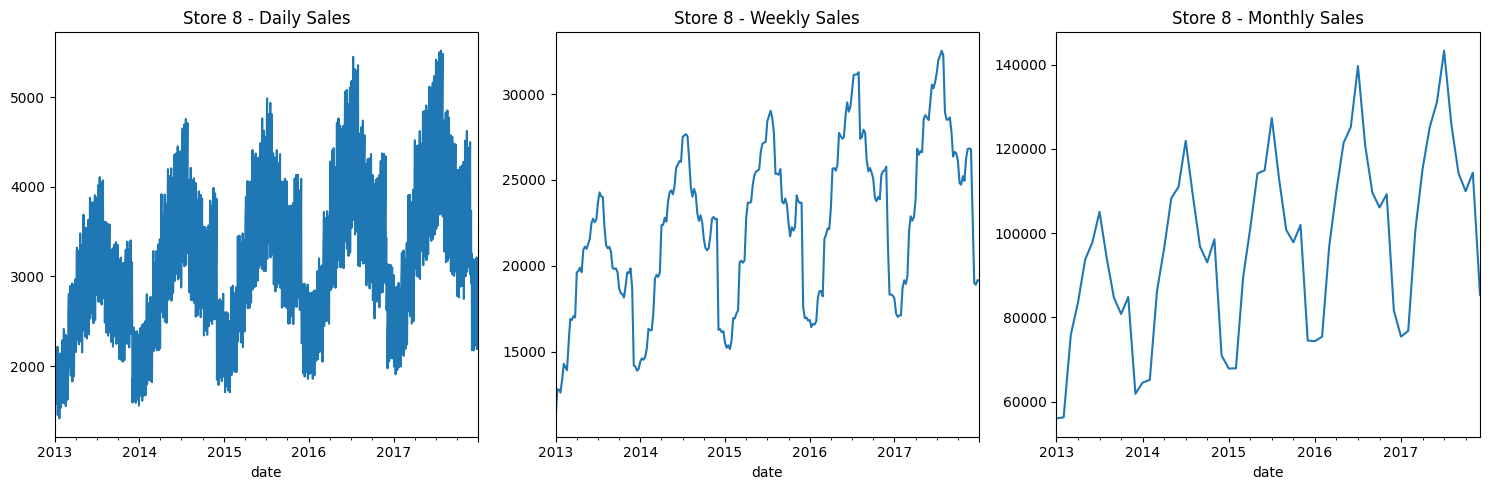

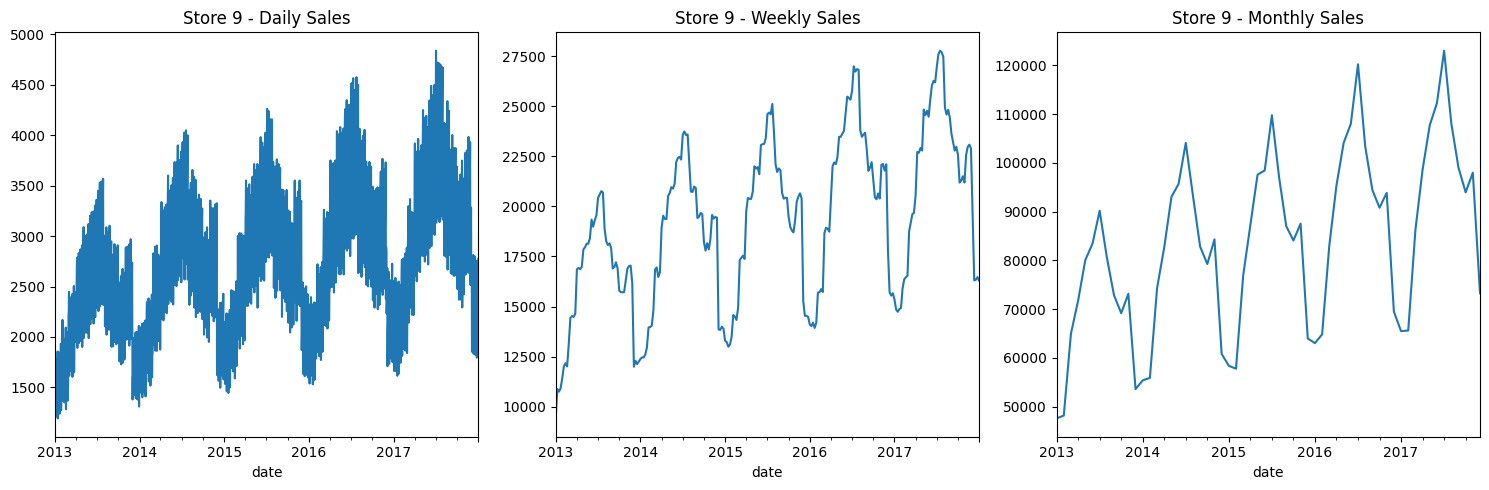

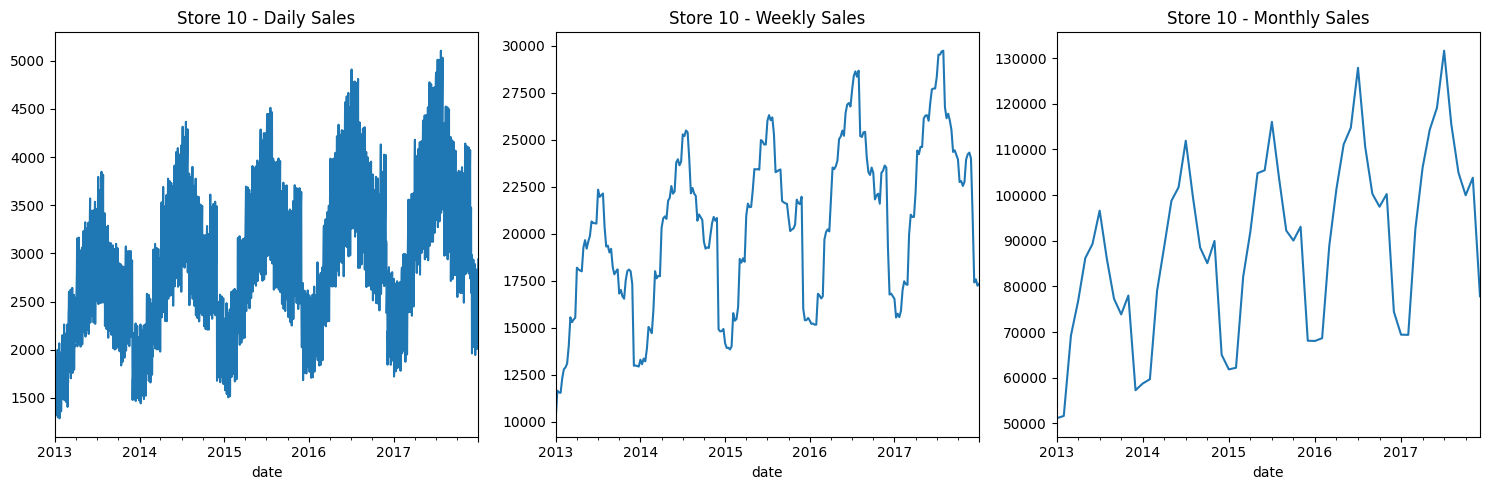

In [ ]:
# Store-wise Analysis
for store in train['store'].unique():
    # Filter data for each store
    store_data = train[train['store'] == store]

    # Aggregate sales data
    daily_sales = store_data.resample('D')['sales'].sum()
    weekly_sales = store_data.resample('W')['sales'].sum()
    monthly_sales = store_data.resample('M')['sales'].sum()

    # Plotting
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    daily_sales.plot(title=f'Store {store} - Daily Sales')

    plt.subplot(1, 3, 2)
    weekly_sales.plot(title=f'Store {store} - Weekly Sales')

    plt.subplot(1, 3, 3)
    monthly_sales.plot(title=f'Store {store} - Monthly Sales')

    plt.tight_layout()
    plt.show()

Descriptive Statistics:
          store          item         sales
count  91300.0  91300.000000  91300.000000
mean       1.0     25.500000     47.268379
std        0.0     14.430949     24.006252
min        1.0      1.000000      1.000000
25%        1.0     13.000000     28.000000
50%        1.0     25.500000     44.000000
75%        1.0     38.000000     63.000000
max        1.0     50.000000    155.000000


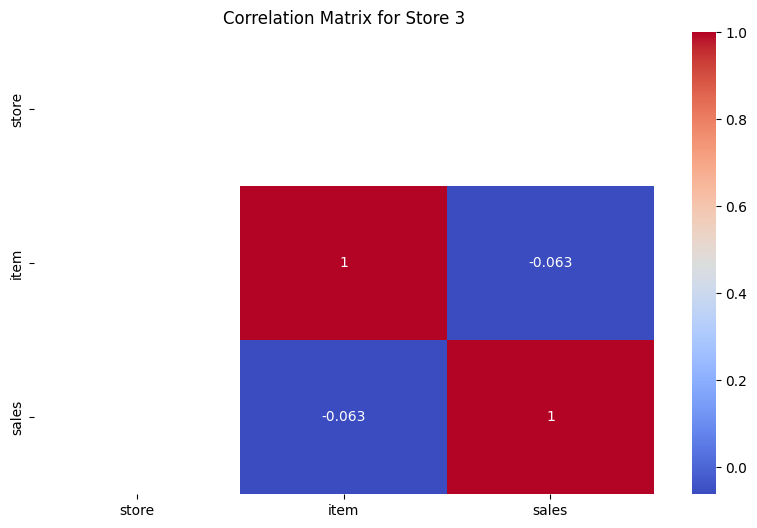

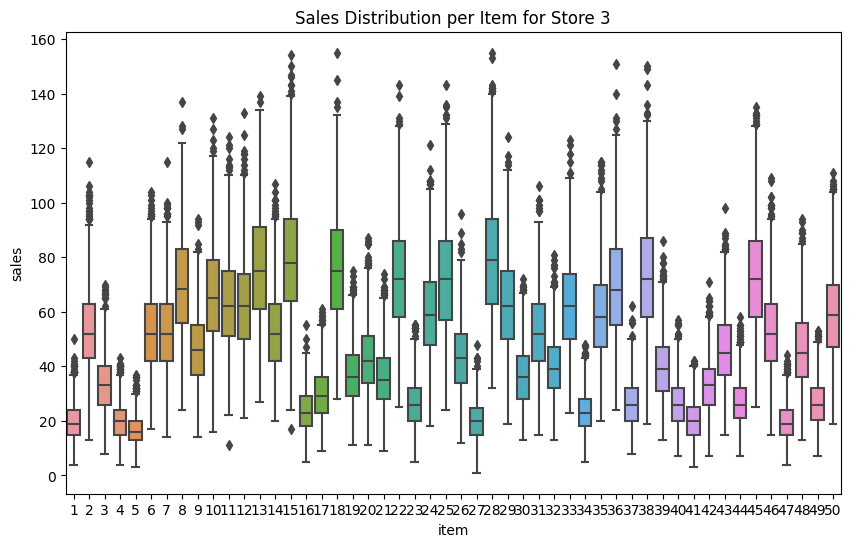

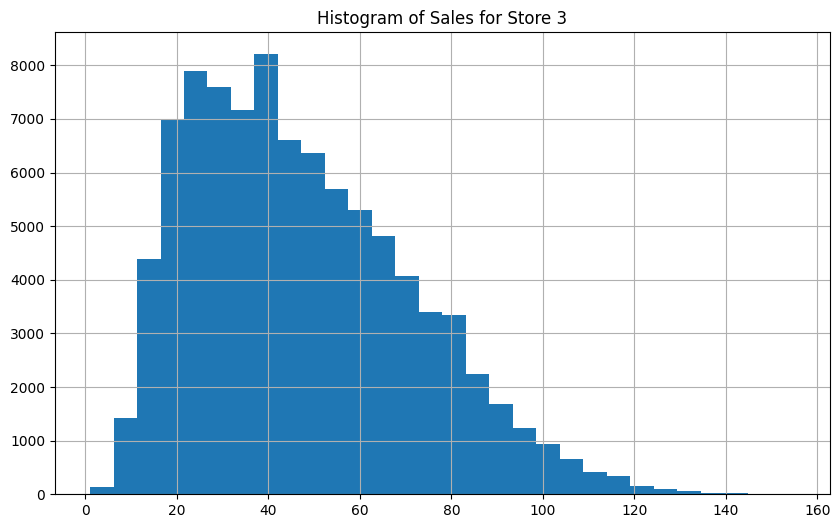

<Figure size 1200x800 with 0 Axes>

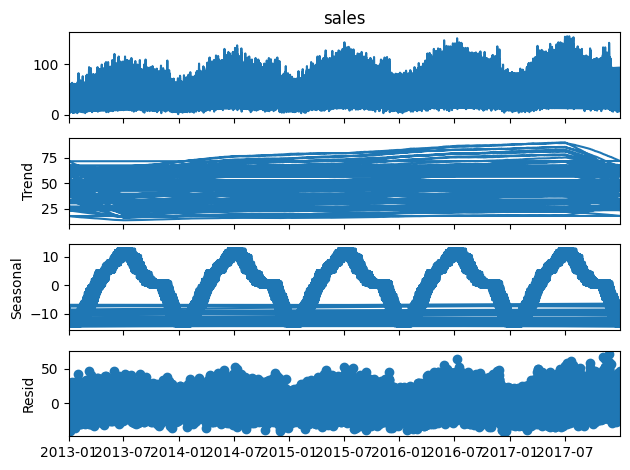

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose



# Filter data for Store 3
store_3_data = train[train['store'] == 1]


# Descriptive Statistics
print("Descriptive Statistics:\n", store_3_data.describe())

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(store_3_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Store 3')
plt.show()

# Box Plot for Sales Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=store_3_data, x='item', y='sales')
plt.title('Sales Distribution per Item for Store 3')
plt.show()

# Histogram of Sales
plt.figure(figsize=(10, 6))
store_3_data['sales'].hist(bins=30)
plt.title('Histogram of Sales for Store 3')
plt.show()

# Time Series Decomposition
decomposition = seasonal_decompose(store_3_data['sales'], model='additive', period=365)
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()



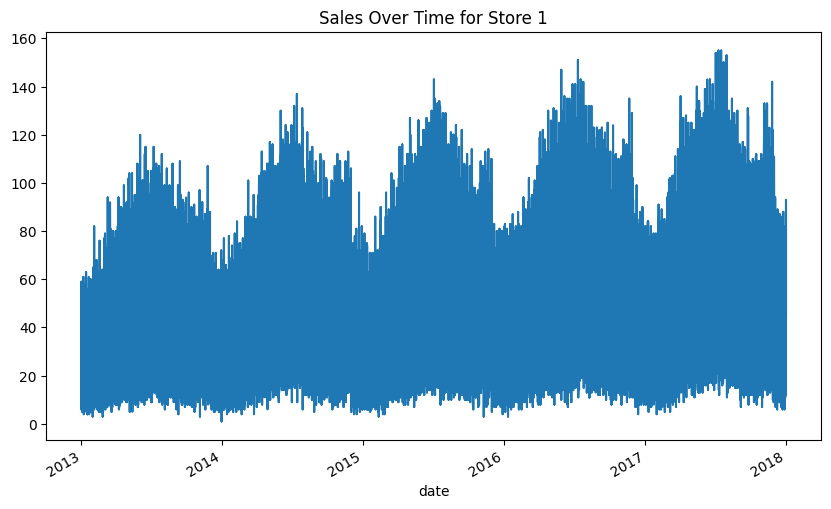

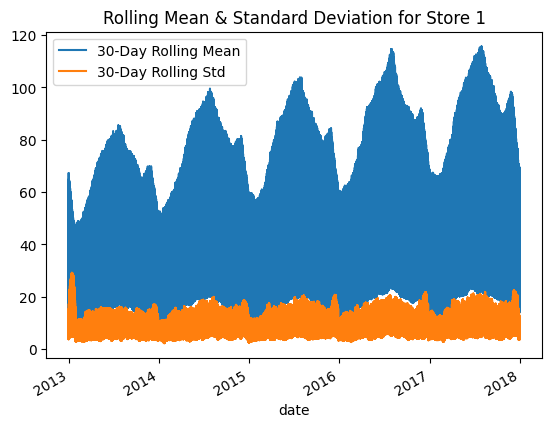

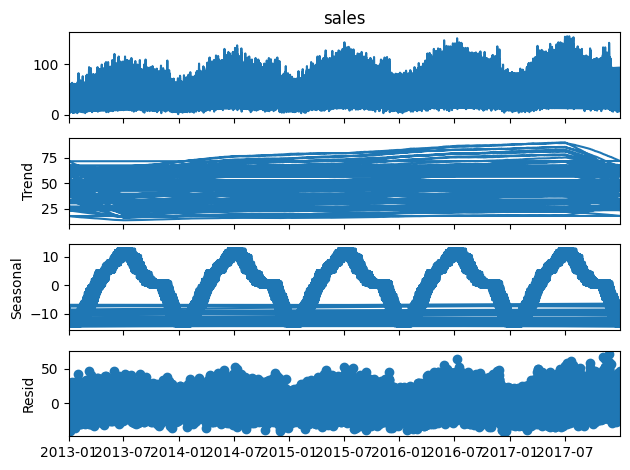

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose



# Filter data for a specific store, e.g., Store 1
store_data = train[train['store'] == 1]



# Time Series Plot
store_data['sales'].plot(title='Sales Over Time for Store 1', figsize=(10, 6))
plt.show()

# Rolling Statistics
store_data['sales'].rolling(window=30).mean().plot(label='30-Day Rolling Mean')
store_data['sales'].rolling(window=30).std().plot(label='30-Day Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation for Store 1')
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(store_data['sales'], model='additive', period=365)
decomposition.plot()
plt.show()



# ARIMA /per store item


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [ ]:
# For store = 1, item = 1
train_df = train[(train['store']==1) & (train['item']==1)]
# train_df.set_index('date')
train_df

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,1,1,14
2017-12-28,1,1,19
2017-12-29,1,1,15


In [ ]:
# Assuming train_df is your DataFrame with date as the index

# Convert the index to datetime format
train_df.index = pd.to_datetime(train_df.index, format="%Y-%m-%d")

# Extract year, month, day of the year, and weekday
train_df['year'] = train_df.index.year
train_df['month'] = train_df.index.month
train_df['day'] = train_df.index.dayofyear
train_df['weekday'] = train_df.index.weekday


# Display the modified DataFrame
print(train_df.head())


            store  item  sales  year  month  day  weekday
date                                                     
2013-01-01      1     1     13  2013      1    1        1
2013-01-02      1     1     11  2013      1    2        2
2013-01-03      1     1     14  2013      1    3        3
2013-01-04      1     1     13  2013      1    4        4
2013-01-05      1     1     10  2013      1    5        5


<Figure size 640x480 with 0 Axes>

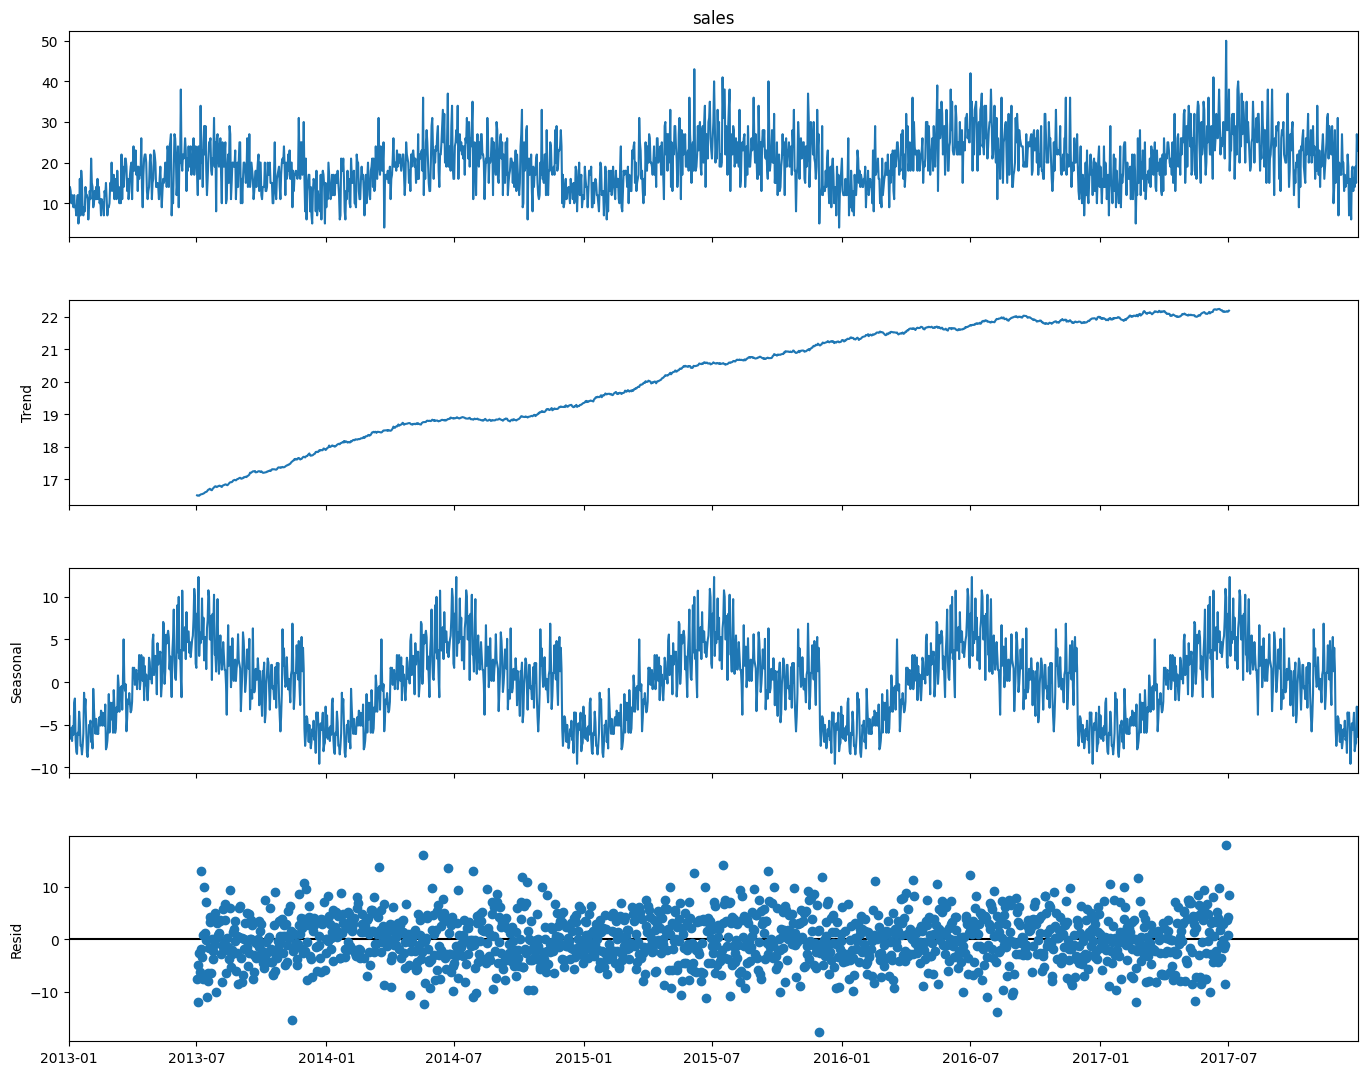

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['sales'], model='additive', period=365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 12)

In [ ]:
# Run Dicky-Fuller test to check for stationarity
result = adfuller(train_df['sales'])
print('The test statistics:', result[0])
print('The p-value:', result[1])

The test statistics: -3.1576705563328042
The p-value: 0.02256938062657153


In [ ]:
#apply differencing
train_df['sales'].diff().dropna()

date
2013-01-02    -2.0
2013-01-03     3.0
2013-01-04    -1.0
2013-01-05    -3.0
2013-01-06     2.0
              ... 
2017-12-27    -2.0
2017-12-28     5.0
2017-12-29    -4.0
2017-12-30    12.0
2017-12-31    -4.0
Name: sales, Length: 1825, dtype: float64

In [ ]:
#we check again how stationary our data is
result = adfuller(train_df['sales'].diff().dropna())
print('The test statistics:', result[0])
print('The p-value:', result[1])

The test statistics: -12.676793886047415
The p-value: 1.2109276320440208e-23


<Axes: xlabel='date'>

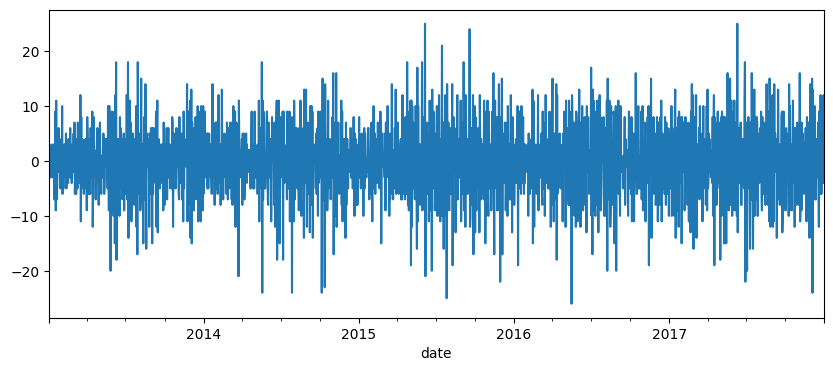

In [ ]:
train_df['sales'].diff().dropna().plot(figsize=(10,4))

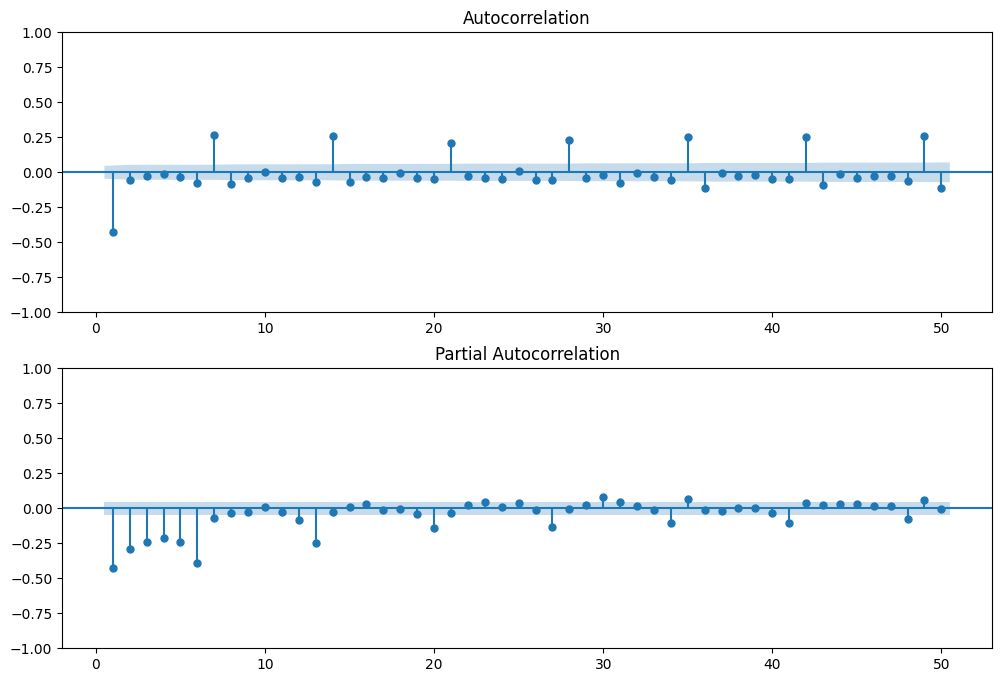

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot Autocorrelation function (ACF) - used to find q parameter
plot_acf(train_df['sales'].diff().dropna(), lags=50, zero=False, ax=ax1)

# Partial Autocorrelation function (PACF) - used to find p parameter
plot_pacf(train_df['sales'].diff().dropna(), lags=50, zero=False, ax=ax2)

plt.show()

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
order_aic_bic = []

# Loop over p values from 0-10
for p in range(10):
    print('p:', p)

    # Loop over q values from 0-10
    for q in range(10):

        try:
            # create and fit ARMA(p,q) model
            model = sm.tsa.ARIMA(train_df.sales, order=(p, 1, q))
            results = model.fit()

            # Print order and results
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            print(p, q, None, None)

# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

p: 0
p: 1
p: 2
p: 3
p: 4
p: 5
p: 6
p: 7
p: 8
p: 9


AIC and BIC: These criteria are used to compare different models. Lower values indicate better model fit and parsimony.

In [ ]:
order_df.sort_values(by='aic', ascending=True).head()

,p,q,aic,bic
98,9,8,10884.266983,10983.435018
78,7,8,10889.849757,10977.999122
67,6,7,10902.846659,10979.977353
99,9,9,10903.590500,11008.267870
88,8,8,10905.813952,10999.472651


In [ ]:
order_df.sort_values(by='bic', ascending=True).head()

,p,q,aic,bic
78,7,8,10889.849757,10977.999122
67,6,7,10902.846659,10979.977353
98,9,8,10884.266983,10983.435018
69,6,9,10910.535652,10998.685016
77,7,7,10916.632780,10999.272809


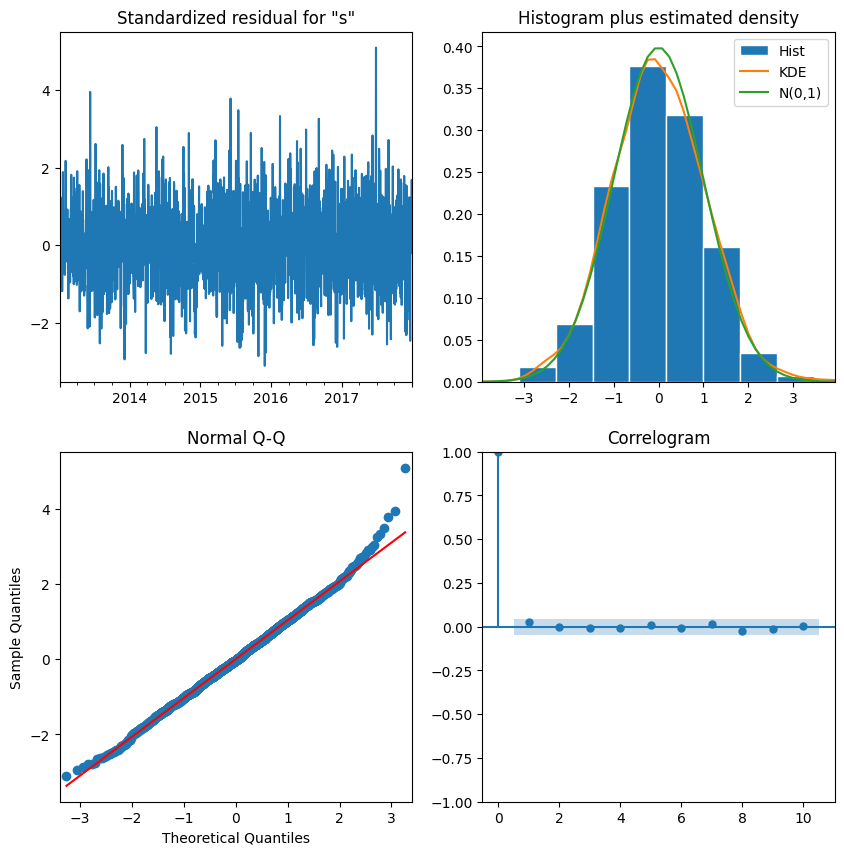

In [ ]:
# Create and fit model
arima_model = sm.tsa.ARIMA(train_df.sales, order=(9,1,8)).fit()

# Create the 4 diagostics plots
arima_model.plot_diagnostics(figsize=(10,10))
plt.show()

In [ ]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1826
Model:                 ARIMA(9, 1, 8)   Log Likelihood               -5424.133
Date:                Tue, 07 Nov 2023   AIC                          10884.267
Time:                        11:59:08   BIC                          10983.435
Sample:                    01-01-2013   HQIC                         10920.848
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0984      0.119     -0.825      0.409      -0.332       0.135
ar.L2         -0.1096      0.123     -0.890      0.374      -0.351       0.132
ar.L3         -0.1019      0.135     -0.756      0.4

<Axes: xlabel='date'>

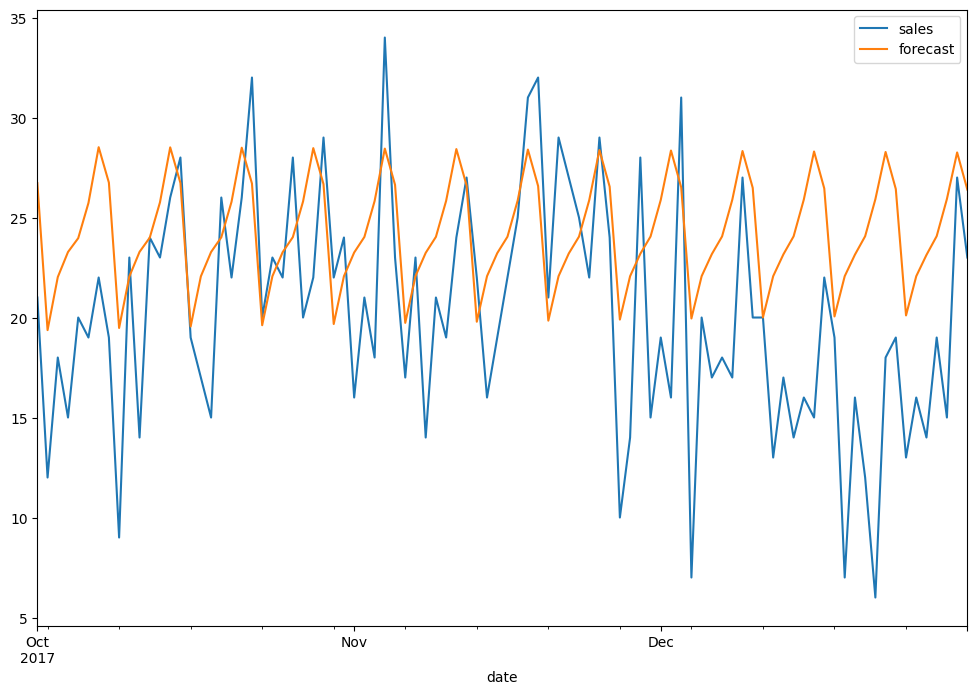

In [ ]:
index_1 = 1734
index_2 = 1826
train_df['forecast'] = arima_model.predict(start=index_1, end=index_2, dynamic= True)
train_df[index_1:index_2][['sales', 'forecast']].plot(figsize=(12, 8))

In [ ]:
def SMAPE(actual, forecast):
    smape = np.mean(np.abs(forecast - actual) / ((np.abs(forecast) + np.abs(actual))/2)) * 100
    print('SMAPE: ', smape)

SMAPE(train_df[1734:1826]['sales'], train_df[1734:1826]['forecast'])

SMAPE:  26.836673968550084


In [ ]:
train_df

,store,item,sales,year,month,day,weekday,forecast
date,,,,,,,,
2013-01-01,1,1,13,2013,1,1,1,NaN
2013-01-02,1,1,11,2013,1,2,2,NaN
2013-01-03,1,1,14,2013,1,3,3,NaN
2013-01-04,1,1,13,2013,1,4,4,NaN
2013-01-05,1,1,10,2013,1,5,5,NaN
...,...,...,...,...,...,...,...,...
2017-12-27,1,1,14,2017,12,361,2,23.129634
2017-12-28,1,1,19,2017,12,362,3,24.069213
2017-12-29,1,1,15,2017,12,363,4,25.925481


In [ ]:
# Dates for training and validation
train_start_date = '2013-01-01'
train_end_date = '2017-09-30'
pred_start_date = '2017-01-10'
pred_end_date = '2017-12-31'

y_val = train.loc[pred_start_date:pred_end_date]
y_val['forecast'] = np.nan

y_val

,store,item,sales,forecast
date,,,,
2017-01-10,1,1,11,NaN
2017-01-11,1,1,14,NaN
2017-01-12,1,1,17,NaN
2017-01-13,1,1,7,NaN
2017-01-14,1,1,16,NaN
...,...,...,...,...
2017-12-27,10,50,63,NaN
2017-12-28,10,50,59,NaN
2017-12-29,10,50,74,NaN


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import time

# Initialize a list to store the sMAPE values
smape_values = []

# Assuming train is your DataFrame and it contains 'store' and 'item' columns
# ...

# Get unique stores and select only the first 3
unique_stores = train['store'].unique()[:3]

# Iterate over store-item pairs, but only for the first 3 stores
for store in unique_stores:
    for item in train[train['store'] == store]['item'].unique():
        start_time = time.time()
        print(f"Processing Store {store}, Item {item}")

        # Filter Data for the current store and item
        train_subset = train[(train['store'] == store) & (train['item'] == item)]

        # Subset for ARIMA model
        y_train = train_subset['sales']

        # Model Training
        model = sm.tsa.ARIMA(y_train, order=(9,1,8))
        results = model.fit()

        # Predictions
        y_val.loc[(y_val['store'] == store) & (y_val['item'] == item), 'forecast'] = results.predict(start=pd.Timestamp(pred_start_date), end=pd.Timestamp(pred_end_date), dynamic=True)

        # Get true and forecasted values
        true_values = y_val.loc[(y_val['store'] == store) & (y_val['item'] == item), 'sales']
        forecast_values = y_val.loc[(y_val['store'] == store) & (y_val['item'] == item), 'forecast']

        # Calculate sMAPE and store it
        smape_values.append(SMAPE(true_values, forecast_values))

        end_time = time.time()
        elapsed_time = (end_time - start_time)
        print(f"Time taken for Store {store}, Item {item}: {elapsed_time:.5f} seconds")

# Calculate average sMAPE
average_smape = np.mean(smape_values)
print(f"Average sMAPE: {average_smape:.2f}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Processing Store 1, Item 1


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE:  31.791269678829387
Time taken for Store 1, Item 1: 11.29316 seconds
Processing Store 2, Item 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE:  37.286938204414085
Time taken for Store 2, Item 1: 11.05703 seconds
Processing Store 3, Item 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE:  35.7045489194214
Time taken for Store 3, Item 1: 11.42442 seconds
Processing Store 4, Item 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE:  35.816037582140304
Time taken for Store 4, Item 1: 13.34476 seconds
Processing Store 5, Item 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE:  41.88106671081257
Time taken for Store 5, Item 1: 10.98830 seconds
Processing Store 6, Item 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE:  39.804588495446325
Time taken for Store 6, Item 1: 11.54343 seconds
Processing Store 7, Item 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE:  40.09022823144237
Time taken for Store 7, Item 1: 13.44444 seconds
Processing Store 8, Item 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE:  nan
Time taken for Store 8, Item 1: 12.66409 seconds
Processing Store 9, Item 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE:  nan
Time taken for Store 9, Item 1: 12.08773 seconds
Processing Store 10, Item 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE:  nan
Time taken for Store 10, Item 1: 10.42818 seconds
Processing Store 1, Item 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE:  32.35515101074126
Time taken for Store 1, Item 2: 9.87793 seconds
Processing Store 2, Item 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


KeyboardInterrupt: ignored